In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Practical Work - Multilayer Perceptron
# Question 3 : Multilayer perceptron with two hidden layers for image classification
You will define un [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) with two hidden layers in order to classify the images from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.


## Introduction - MNIST Database
Objective: use a multilayer perceptron (MLP) for the classification of images from the MNIST database.

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box (784 values) and anti-aliased, which introduced grayscale levels. The MNIST database contains 60,000 training images and 10,000 testing images. In the original paper of the creators, they use a support-vector machine to get an error rate of 0.8%.

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

 




## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Data ( MNIST Database )
The MNIST data is loaded and its parameters are retrieved (number of examples, of classes, input size).

In [ ]:
(x_train, y_train), (x_test, y_test) =tk.datasets.mnist.load_data()

num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))/255
x_test  = x_test.reshape((num_test, num_input))/255

# Normalization
print("Input size: ",num_input)
print("Number of examples: ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 0s 0us/step
Input size:  784
Number of examples:  60000


##Multilayer perceptron with two hidden layers
### Parameters of the Network
- 256 hidden neurons in each hidden layer;
- batch size =  100;
- 15 iterations for learning (epoch).

In [ ]:
# Parameters
lr = 0.001
num_epochs = 15
batch_size = 100

# Numbers of neurons for the two hidden layers
num_hidden_1 = 256 
num_hidden_2 = 256 

### Model 
Building the model is done in 3 steps:
- network (sequential model);
- Loss function : in classification problems, the [binary cross entropy function](https://en.wikipedia.org/wiki/Cross_entropy) calculated between the ground truth and the predicted output is widely used;
- Optimization procedure : gradient descent by [the Adam optimizer](https://arxiv.org/abs/1412.6980).

In [ ]:
# Model definition
# TODO : build the network
model = Sequential()

model.add(Dense(input_dim=num_input, units=num_hidden_1, activation='relu',name='dense1'))
model.add(Dense(input_dim=num_hidden_1, units=num_hidden_2, activation='relu', name='dense2'))
model.add(Dense(input_dim=num_hidden_2, units=num_classes, activation='softmax', name='output'))

# Prints a string summary of the network.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
dense2 (Dense)               (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Loss function and optimization procedure 
#TODO : define loss function and optimization procedure

adam = Adam(learning_rate=lr)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['acc'])

### Training the model

Train the model for a fixed number of epochs using the Keras function [<code>fit</code>](https://keras.io/api/models/model_training_apis/#fit-method).

In [ ]:
# Model training
#TODO : training the model

hist=model.fit(x=x_train, y=y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/15
600/600 [==============================] - 4s 2ms/step - loss: 0.1160 - acc: 0.8133
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0220 - acc: 0.9679
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0133 - acc: 0.9813
Epoch 4/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - acc: 0.9862
Epoch 5/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0068 - acc: 0.9906
Epoch 6/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 0.9941
Epoch 7/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0034 - acc: 0.9959
Epoch 8/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0031 - acc: 0.9959
Epoch 9/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0026 - acc: 0.9967
Epoch 10/15
600/600 [==============================] - 1s 2ms/step - loss: 0.0016 - acc: 0.9984
Epoch 11/15
600/600 [============================

### Results (Accuracy on the training database)

In [ ]:
# Accuracy on the training database
print("Accuracy on the training database ={0:5.3f} ".format(hist.history.get('acc')[-1]))

Accuracy on the training database =0.999 


### Results on the test dataset
Return the loss value & metrics values for the model in test mode  using the Keras function [<code>evaluate</code>](https://keras.io/api/models/model_training_apis/#evaluate-method).

313/313 [==============================] - 1s 2ms/step - loss: 0.0156 - acc: 0.9835


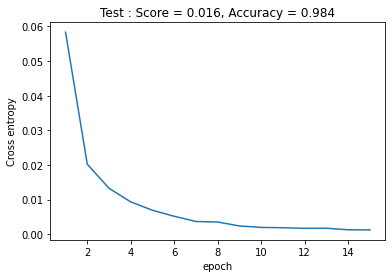

Number of errors 165/10000




<Figure size 432x288 with 0 Axes>

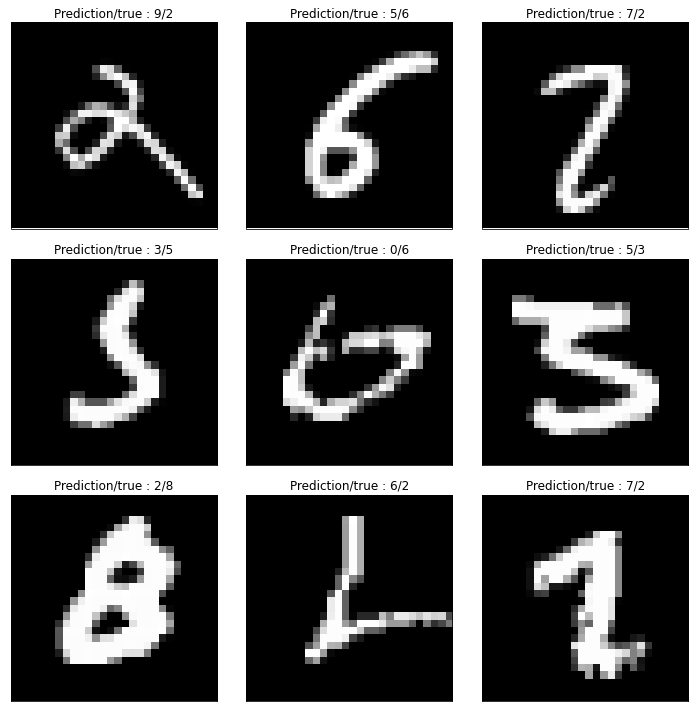

In [ ]:
score = model.evaluate(x_test,y_test)

x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.subplots(1,1)
plt.xlabel('epoch')
plt.ylabel('Cross entropy')
plt.title("Test : Score = {0:5.3f}, Accuracy = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prediction/true : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Number of errors {}/{}\n\n".format(incorrects.size,y.size))
